In [ ]:
import numpy as np # used for numerical computing in Python.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk

In [ ]:
import pandas
df_sms = pd.read_csv('spam.csv',encoding='latin-1')  # text files that may contain characters outside of the ASCII range.
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print(len(df_sms))

5572


In [ ]:
df_sms.label.value_counts()  #frequency of each unique value

label
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

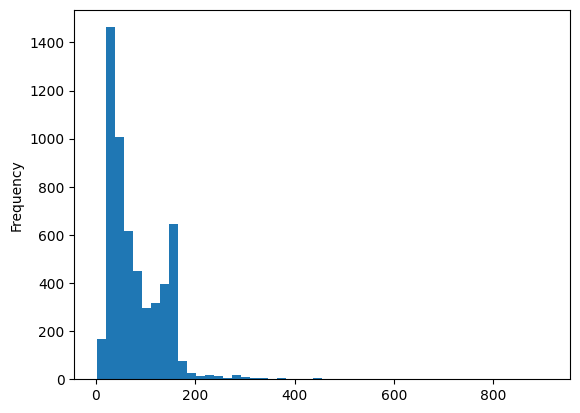

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_sms['length'].plot(bins=50, kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

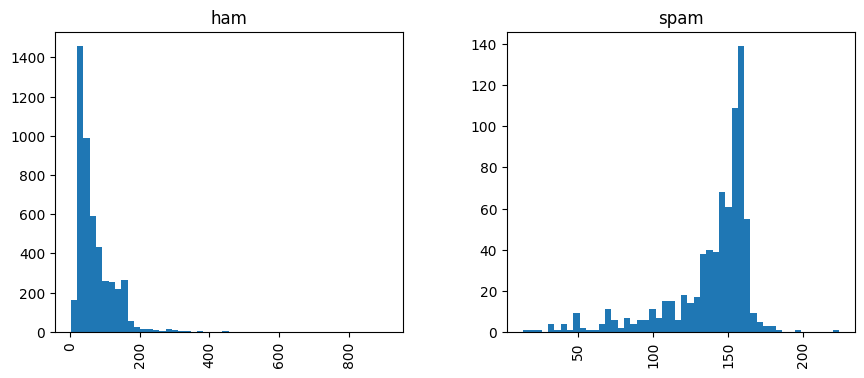

In [ ]:
df_sms.hist(column='length', by='label', bins=50,figsize=(10,4))

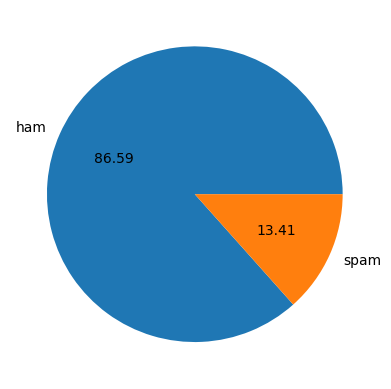

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'label' column
plt.pie(df_sms['label'].value_counts(), labels=['ham', 'spam'], autopct='%.2f')  #with two decimal places.
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   sms     5572 non-null   object
 2   length  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB
None


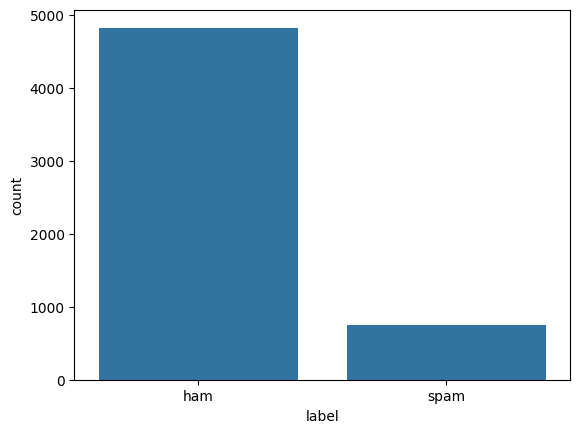

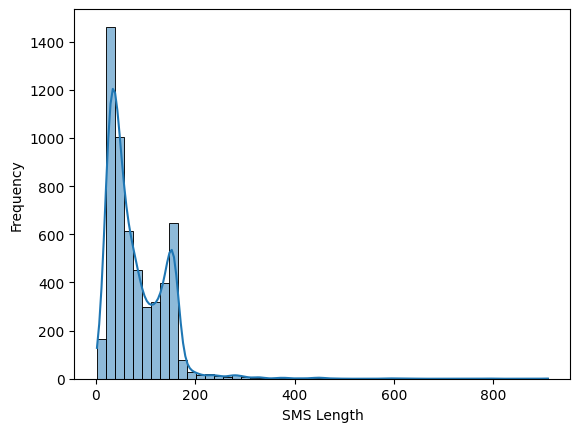

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display some basic information about the dataset
print(df_sms.info())

# Check the distribution of labels
sns.countplot(x='label', data=df_sms)
plt.show()

# Visualize the distribution of SMS length
sns.histplot(df_sms['length'], bins=50, kde=True)
plt.xlabel('SMS Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
documents = ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
             'Ok lar... Joking wif u oni...',
             'U dun say so early hor... U c already then say...',
             'Nah I dont think he goes to usf, he lives around here though']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...', 'ok lar... joking wif u oni...', 'u dun say so early hor... u c already then say...', 'nah i dont think he goes to usf, he lives around here though']


In [ ]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))

sans_punctuation_documents

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though']

In [ ]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say'],
 ['nah',
  'i',
  'dont',
  'think',
  'he',
  'goes',
  'to',
  'usf',
  'he',
  'lives',
  'around',
  'here',
  'though']]

In [ ]:
frequency_list = []
import pprint  # pretty-print - prints data structures
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'go': 1,
          'until': 1,
          'jurong': 1,
          'point': 1,
          'crazy': 1,
          'available': 1,
          'only': 1,
          'in': 1,
          'bugis': 1,
          'n': 1,
          'great': 1,
          'world': 1,
          'la': 1,
          'e': 1,
          'buffet': 1,
          'cine': 1,
          'there': 1,
          'got': 1,
          'amore': 1,
          'wat': 1}),
 Counter({'ok': 1, 'lar': 1, 'joking': 1, 'wif': 1, 'u': 1, 'oni': 1}),
 Counter({'u': 2,
          'say': 2,
          'dun': 1,
          'so': 1,
          'early': 1,
          'hor': 1,
          'c': 1,
          'already': 1,
          'then': 1}),
 Counter({'he': 2,
          'nah': 1,
          'i': 1,
          'dont': 1,
          'think': 1,
          'goes': 1,
          'to': 1,
          'usf': 1,
          'lives': 1,
          'around': 1,
          'here': 1,
          'though': 1})]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming documents is a list of strings
documents = ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
             'Ok lar... Joking wif u oni...',
             'U dun say so early hor... U c already then say...',
             'Nah I dont think he goes to usf, he lives around here though']

count_vector = CountVectorizer()
count_vector.fit(documents)

feature_names = count_vector.get_feature_names_out()
print(feature_names)


['already' 'amore' 'around' 'available' 'buffet' 'bugis' 'cine' 'crazy'
 'dont' 'dun' 'early' 'go' 'goes' 'got' 'great' 'he' 'here' 'hor' 'in'
 'joking' 'jurong' 'la' 'lar' 'lives' 'nah' 'ok' 'oni' 'only' 'point'
 'say' 'so' 'then' 'there' 'think' 'though' 'to' 'until' 'usf' 'wat' 'wif'
 'world']


In [ ]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]])

In [ ]:
# Assuming documents is a list of strings
documents = ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
             'Ok lar... Joking wif u oni...',
             'U dun say so early hor... U c already then say...',
             'Nah I dont think he goes to usf, he lives around here though']

count_vector = CountVectorizer()
doc_array = count_vector.fit_transform(documents).toarray()

# Get feature names
feature_names = count_vector.get_feature_names_out()

frequency_matrix = pd.DataFrame(doc_array, columns=feature_names)
print(frequency_matrix)


   already  amore  around  available  buffet  bugis  cine  crazy  dont  dun  \
0        0      1       0          1       1      1     1      1     0    0   
1        0      0       0          0       0      0     0      0     0    0   
2        1      0       0          0       0      0     0      0     0    1   
3        0      0       1          0       0      0     0      0     1    0   

   ...  then  there  think  though  to  until  usf  wat  wif  world  
0  ...     0      1      0       0   0      1    0    1    0      1  
1  ...     0      0      0       0   0      0    0    0    1      0  
2  ...     1      0      0       0   0      0    0    0    0      0  
3  ...     0      0      1       1   1      0    1    0    0      0  

[4 rows x 41 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'],
                                                    df_sms['label'],
                                                    test_size=0.20,
                                                    random_state=1)

count_vector = CountVectorizer()

training_data = count_vector.fit_transform(X_train)

testing_data = count_vector.transform(X_test)

y_train = y_train.astype(int)

# Instantiate and fit the Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

predictions = naive_bayes.predict(testing_data)

y_test = y_test.astype(int)

# Compute evaluation metrics
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447652


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'],
                                                    df_sms['label'],
                                                    test_size=0.20,
                                                    random_state=1)

vectorizer = CountVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)

X_test_vectorized = vectorizer.transform(X_test)

y_train = y_train.astype(int)

gnb = GaussianNB()
gnb.fit(X_train_vectorized.toarray(), y_train)

y_pred = gnb.predict(X_test_vectorized.toarray())

y_test = y_test.astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9121076233183857
Precision: 0.5919282511210763
Recall: 0.9496402877697842
F1 Score: 0.7292817679558011


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'],
                                                    df_sms['label'],
                                                    test_size=0.20,
                                                    random_state=1)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

y_train = y_train.astype(int)

bnb = BernoulliNB()
bnb.fit(X_train_vectorized, y_train)

y_pred = bnb.predict(X_test_vectorized)

y_test = y_test.astype(int)

# Step 6: Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9847533632286996
Precision: 1.0
Recall: 0.8776978417266187
F1 Score: 0.9348659003831418


In [ ]:
def classify_sentence(sentence):
    lab = ['ham', 'spam']

    x = cv.transform([sentence])

    prediction = classifier.predict(x)[0]

    print(f"The input sentence '{sentence}' is classified as: {lab[prediction]}")

# Input any sentence from the dataset
input_sentence = input("Enter a sentence from the dataset: ")

# Call the function to classify the input sentence
classify_sentence(input_sentence)

Enter a sentence from the dataset: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
The input sentence 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...' is classified as: ham


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_cv, y_train)

X_test_cv = cv.transform(X_test)
predictions = classifier.predict(X_test_cv)

conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Extract misclassified records for further analysis
misclassified_indices = y_test != predictions
misclassified_records = X_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = predictions[misclassified_indices]

# Display misclassified records along with true and predicted labels
print("\nMisclassified Records:")
for sms, true_label, predicted_label in zip(misclassified_records, true_labels, predicted_labels):
    print(f"SMS: {sms}")
    print(f"True Label: {'spam' if true_label == 1 else 'ham'}")
    print(f"Predicted Label: {'spam' if predicted_label == 1 else 'ham'}")
    print("="*50)

Confusion Matrix:
[[963   2]
 [ 16 134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Misclassified Records:
SMS: Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
True Label: spam
Predicted Label: ham
SMS: I liked the new mobile
True Label: ham
Predicted Label: spam
SMS: ringtoneking 84484
True Label: spam
Predicted Label: ham
SMS: Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
True Label: spam
Predicted Label: ham
SMS: Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost pr

In [ ]:
classifier = GaussianNB()

classifier.fit(X_train_cv.toarray(), y_train)

X_test_cv = cv.transform(X_test)
predictions = classifier.predict(X_test_cv.toarray())

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Extract misclassified records for further analysis
misclassified_indices = y_test != predictions
misclassified_records = X_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = predictions[misclassified_indices]

# Display misclassified records along with true and predicted labels
print("\nMisclassified Records:")
for sms, true_label, predicted_label in zip(misclassified_records, true_labels, predicted_labels):
    print(f"SMS: {sms}")
    print(f"True Label: {'spam' if true_label == 1 else 'ham'}")
    print(f"Predicted Label: {'spam' if predicted_label == 1 else 'ham'}")
    print("="*50)

Confusion Matrix:
[[866  99]
 [ 12 138]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       965
           1       0.58      0.92      0.71       150

    accuracy                           0.90      1115
   macro avg       0.78      0.91      0.83      1115
weighted avg       0.93      0.90      0.91      1115


Misclassified Records:
SMS: K.i did't see you.:)k:)where are you now?
True Label: ham
Predicted Label: spam
SMS: You flippin your shit yet?
True Label: ham
Predicted Label: spam
SMS: K, if u bored up just come to my home..
True Label: ham
Predicted Label: spam
SMS: Can you pls send me that company name. In saibaba colany
True Label: ham
Predicted Label: spam
SMS: life alle mone,eppolum oru pole allalo
True Label: ham
Predicted Label: spam
SMS: But i have to. I like to have love and arrange.
True Label: ham
Predicted Label: spam
SMS: K:)eng rocking in ashes:)
True Label: ham
Predicted Label: spam
SMS:

In [ ]:
classifier = BernoulliNB()

classifier.fit(X_train_cv, y_train)

X_test_cv = cv.transform(X_test)
predictions = classifier.predict(X_test_cv)

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Extract misclassified records for further analysis
misclassified_indices = y_test != predictions
misclassified_records = X_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = predictions[misclassified_indices]

# Display misclassified records along with true and predicted labels
print("\nMisclassified Records:")
for sms, true_label, predicted_label in zip(misclassified_records, true_labels, predicted_labels):
    print(f"SMS: {sms}")
    print(f"True Label: {'spam' if true_label == 1 else 'ham'}")
    print(f"Predicted Label: {'spam' if predicted_label == 1 else 'ham'}")
    print("="*50)

Confusion Matrix:
[[965   0]
 [ 28 122]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115


Misclassified Records:
SMS: Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
True Label: spam
Predicted Label: ham
SMS: Loans for any purpose even if you have Bad Credit! Tenants Welcome. Call NoWorriesLoans.com on 08717111821
True Label: spam
Predicted Label: ham
SMS: tddnewsletter@emc1.co.uk (More games from TheDailyDraw) Dear Helen, Dozens of Free Games - with great prizesWith..
True Label: spam
Predicted Label: ham
SMS: ringtoneking 84484
True Label: spam
Predicted Label: ham
SMS: You hav